In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

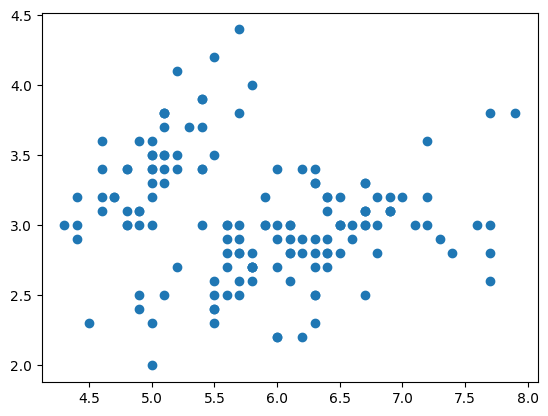

In [ ]:
iris = datasets.load_iris()
features = iris.data
plt.scatter(features[:, 0], features[:, 1])
plt.show()

In [ ]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

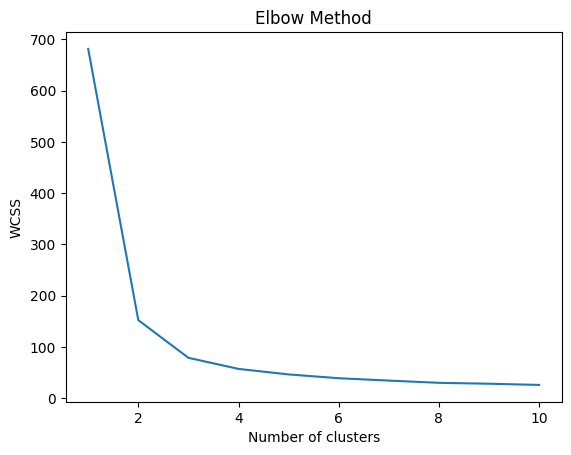

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0,)
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

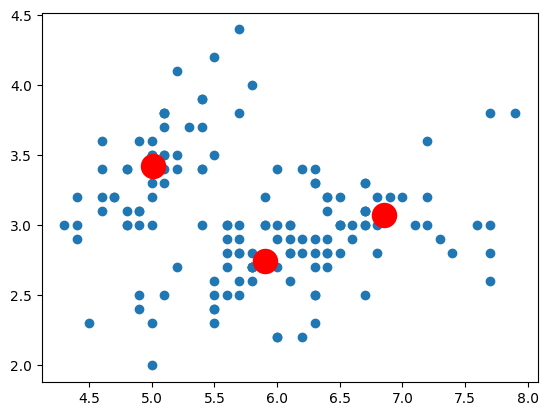

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
plt.scatter(features[:,0], features[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

###DATASET TEXT

In [ ]:
#import library
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

# Membuat dataset acak dengan 400 data (2 fitur)
np.random.seed(42)  # Untuk hasil yang konsisten
data = np.random.rand(400, 2)  # 400 data, 2 fitur
np.savetxt("dataku.txt", data)  # Menyimpan data ke file "dataku.txt"

In [ ]:
#baca dataset
datasetPth = 'dataku.txt'
data = np.loadtxt(datasetPth, delimiter=' ')

iter: 1
centroid: [[0.78808199 0.6412235 ]
 [0.29870046 0.45557737]]


<ipython-input-57-474a7c5e2b3f>:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
<ipython-input-57-474a7c5e2b3f>:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()


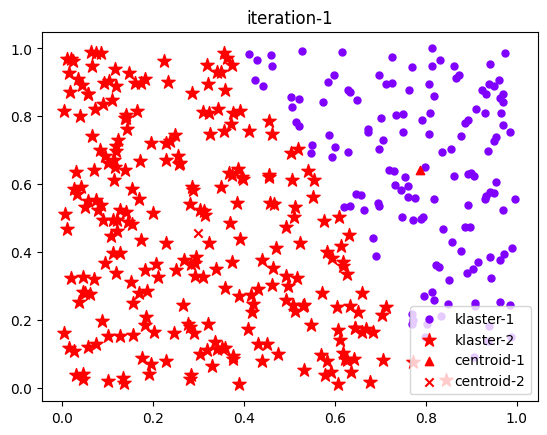

ValueError: operands could not be broadcast together with shapes (400,2) (800,) 

In [ ]:
#mendefinisikan parameter k-means klastering
k = 2 #jumlah klaster yg diinginkan
iterationCounter = 0 #menghitung iterasi klastering
input = data #dataset yg digunakan

#fungsi untuk inisialisasi titik pusat klaster (random)
def initCentroid(dataIn, k):
  result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
  return result

#fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-" + str(i+1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()
                    , c=col, label="centroid-" + str(i + 1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.legend()
        plt.show(block=True)

#fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()
                    , c=col, label="centroid-" + str(i + 1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.legend()
        plt.show(block=True)

# fungsi utama algoritma k-means
def kMeans(data, centroidInit):
    nCluster = k  # banyaknya klaster
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    # looping hingga konvergen
    while(True):
        iterationCounter += 1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        # ulangi proses untuk semua klaster
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i, :], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data, centroidRepeated))
            # hitung jarak Euclidean
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        # tempatkan data ke klaster yang jarak Euclideannya paling dekat
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):  # assign data to cluster regarding cluster matrix
            listClusterMember[clusterMatrix[i].item()].append(data[i, :])

        # hitung titik pusat klaster terbaru
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0, nCluster):
            memberCluster = np.asarray(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, np.expand_dims(centroidCluster, axis=0)), axis=0)

        print("iter:", iterationCounter)
        print("centroid:", newCentroid)
        # break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):
            break
        # update titik pusat klaster dengan nilai yg baru
        centroidInit = newCentroid
        # plot hasil klaster per iterasi
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1)  # diberi jeda 1 detik agar hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit


#panggil fungsi inisialisasi klaster
centroidInit = initCentroid(input, k)
#panggil fungsi k-means
clusterResults, centroid = kMeans(input, centroidInit)
#plot hasil final klaster setelah konvergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)


###DATASET CSV

In [ ]:
#import library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#menyiapkan dataset
dt = pd.read_csv('konsumen.csv')
dt.keys()

Index(['Gaji', 'Pengeluaran'], dtype='object')

In [ ]:
#menampilkan 5 baris data pertama
dtku = pd.DataFrame(dt)
dtku.head()

,Gaji,Pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


In [ ]:
#konversi data array
X = np.asarray(dt)
print(X)

[[ 2500  1750]
 [ 3800  4200]
 [ 3900  3800]
 [ 4350  5500]
 [ 4400  3200]
 [ 5500  5450]
 [ 5600  5950]
 [ 5750  4100]
 [ 6850  6050]
 [ 6900  8500]
 [ 7250  9500]
 [ 7350  6050]
 [ 7500  8500]
 [ 7800  9500]
 [ 8200  8300]
 [ 8500  6500]
 [ 8550  8400]
 [ 8750  6000]
 [ 9100 10500]
 [ 9100  8500]]


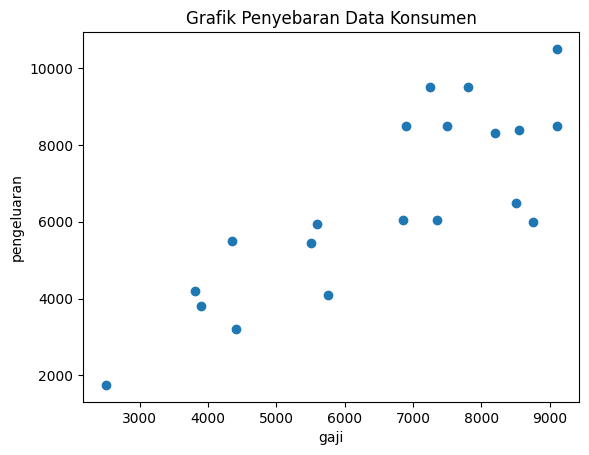

In [ ]:
#menampilkan data daam bentuk scatter plot
plt.scatter(X[:, 0], X[:, 1], label='True Position')
plt.xlabel('gaji')
plt.ylabel('pengeluaran')
plt.title('Grafik Penyebaran Data Konsumen')
plt.show()

In [ ]:
#menagtifkan K-Means dgn jumlah k=2
kmeans = KMeans(n_clusters=2).fit(X)

In [ ]:
#menampilkan nilai centroid yang digenerate oleh algoritma
print(kmeans.cluster_centers_)

[[7987.5  8025.  ]
 [4475.   4243.75]]


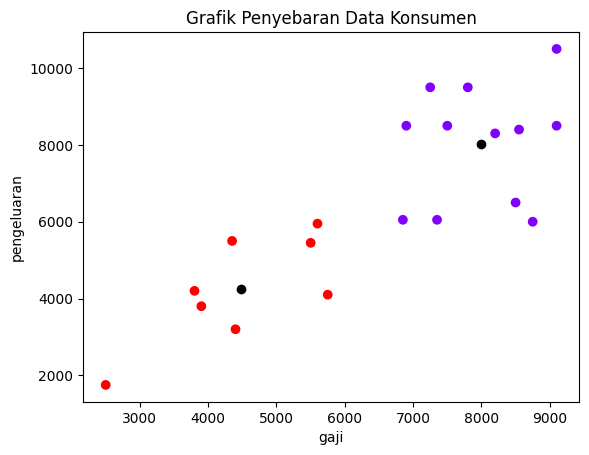

In [ ]:
#plot data point
#visualisai hasil klasterisasi data
plt.scatter(X[:, 0], X[:, 1], c= kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1], color='black')
plt.xlabel('gaji')
plt.ylabel('pengeluaran')
plt.title('Grafik Penyebaran Data Konsumen')
plt.show()